Maximum Subarray Sort

In [18]:
#List Preparation
import random
import time 
list_prep = [random.randint(-100,100) for i in range(8)]
# list_merge = [2,4,5,7,1,2,3,6]
print('List :', list_prep)
print('Amount :',len(list_prep))
l = list_prep.index(list_prep[0])
m = (list_prep.index(list_prep[-1])+1)//2
h = list_prep.index(list_prep[-1])+1
print(f'{l,m,h = }')
print(f'{sum(list_prep) = }')

List : [-79, 39, 43, -82, 60, 42, -89, -28]
Amount : 8
l,m,h = (0, 4, 8)
sum(list_prep) = -94


In [19]:
import math
def find_max_crossing_subarray(list,low,mid,high):
    left_sum = -math.inf
    sum = 0
    for i in range(mid-1,low-1,-1):
        # print('i :',i,end = ' ')
        sum = sum + list[i]
        # print(f'{sum = }')
        if sum > left_sum:
            left_sum = sum
            max_left = i
        # print(f'{max_left = }')

    right_sum = -math.inf
    sum = 0
    for j in range(mid,high,1):
        # print('j :',j,end = ' ')
        sum = sum + list[j]
        # print(f'{sum = }')
        if sum > right_sum:
            right_sum = sum
            max_right = j 
        # print(f'{max_right = }')

    return max_left, max_right, left_sum+right_sum

# find_max_crossing_subarray(list_prep,l,m,h)

In [23]:
def find_max_subarray(list,low,high):
    if high - 1 == low:
        # print()
        # print(f'{low, high, list[low] = }')
        return (low, high, list[low])
    else :
        mid = (low+high)//2
        # print(f'{mid = }',end = ', ')
        
        (left_low, left_high, left_sum) = find_max_subarray(list, low, mid)
        # print(f'{left_low, left_high, left_sum = }')

        (right_low, right_high, right_sum) = find_max_subarray(list, mid, high)
        # print(f'{right_low, right_high, right_sum = }')

        (cross_low, cross_high, cross_sum) = find_max_crossing_subarray(list, low, mid, high)
        # print(f'{cross_low, cross_high, cross_sum = }')

        if left_sum >= right_sum and left_sum >= cross_sum:
            # print(f'{left_low, left_high, left_sum =}')
            return (left_low, left_high, left_sum) 

        elif right_sum >= left_sum and right_sum >= cross_sum:
            # print(f'{right_low, right_high, right_sum =}')
            return (right_low, right_high, right_sum)
            
        else:
            # print(f'{cross_low, cross_high, cross_sum =}')
            return (cross_low, cross_high, cross_sum)

        
find_max_subarray(list_prep,l,h)

Start_time = time.process_time()
end_time = time.process_time()
print("Elapsed time during the whole program in seconds:",end_time-Start_time) 

Elapsed time during the whole program in seconds: 0.0


Program the maximum subarray problem in python.

Seek to plot the actual time spent and compare it with the theoretical complexity we learn in the class. Attempt to compare many sizes of n. Is the actual time close to the theoretical complexity?

Hint: You need to convert complexity into the same scale as time, so you can compare it with actual performances. To convert steps to time, you simply need to multiply with some c.   For example, instead of plotting n log n, you plot c * n log n.     For my choice, I use c = 1/500,000 and it looks good, but it is up to you.

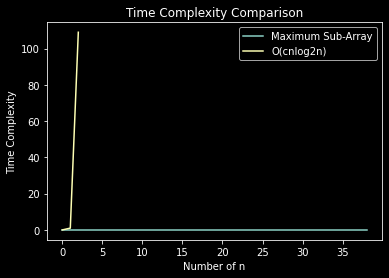

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time
c = 1/500000
cnlog2n = [c*n*math.log2(n) for n in range(1,40)]
# print(cnlog2n)
list_random = [random.randint(-100,100) for i in range(40)]

plt.plot(cnlog2n,label='Maximum Sub-Array')
plt.plot(find_max_subarray(list_random,l,h),label='O(cnlog2n)')
plt.legend()
plt.xlabel("Number of n")
plt.ylabel("Time Complexity")
plt.title("Time Complexity Comparison")
plt.show()